In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Get the Data

Working with the Ecommerce Customers csv file from the company. It has Customer info, suchas Email, Address, and their color Avatar. Then it also has numerical value columns:

* Avg. Session Length: Average session of in-store style advice sessions.
* Time on App: Average time spent on App in minutes
* Time on Website: Average time spent on Website in minutes
* Length of Membership: How many years the customer has been a member. 

** Reading in the Ecommerce Customers csv file as a DataFrame.**

In [7]:
df=pd.read_csv('Ecommerce Customers.csv')

In [8]:
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [9]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Email                   500 non-null object
Address                 500 non-null object
Avatar                  500 non-null object
Avg. Session Length     500 non-null float64
Time on App             500 non-null float64
Time on Website         500 non-null float64
Length of Membership    500 non-null float64
Yearly Amount Spent     500 non-null float64
dtypes: float64(5), object(3)
memory usage: 31.3+ KB


## Exploratory Data Analysis

**Let's explore the data!**


___
**Using seaborn to create a jointplot to compare the Time on Website and Yearly Amount Spent columns. Does the correlation make sense?**

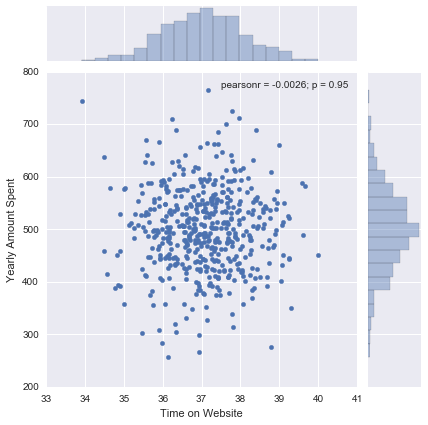

In [14]:
sns.jointplot(x='Time on Website',y='Yearly Amount Spent',data=df,kind='scatter')

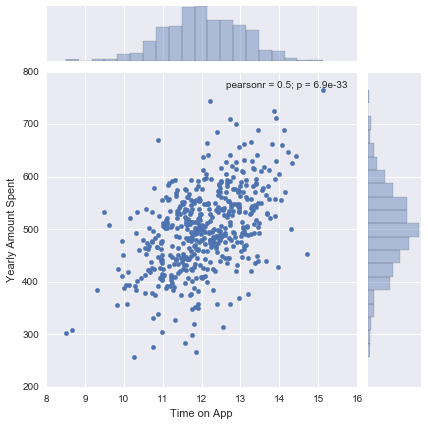

In [15]:
sns.jointplot(x='Time on App',y='Yearly Amount Spent',data=df,kind='scatter')

** Using jointplot to create a 2D hex bin plot comparing Time on App and Length of Membership.**

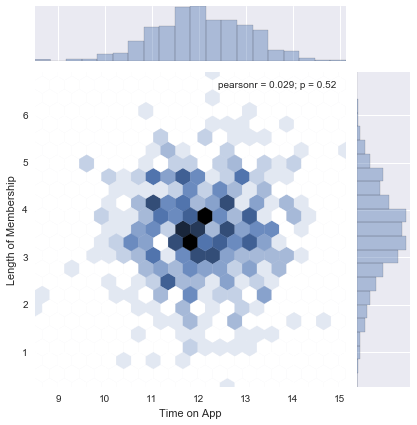

In [16]:
sns.jointplot(x='Time on App',y='Length of Membership',data=df,kind='hex')

**Let's explore these types of relationships across the entire data set. Using [pairplot](https://stanford.edu/~mwaskom/software/seaborn/tutorial/axis_grids.html#plotting-pairwise-relationships-with-pairgrid-and-pairplot) to recreate the plot below**

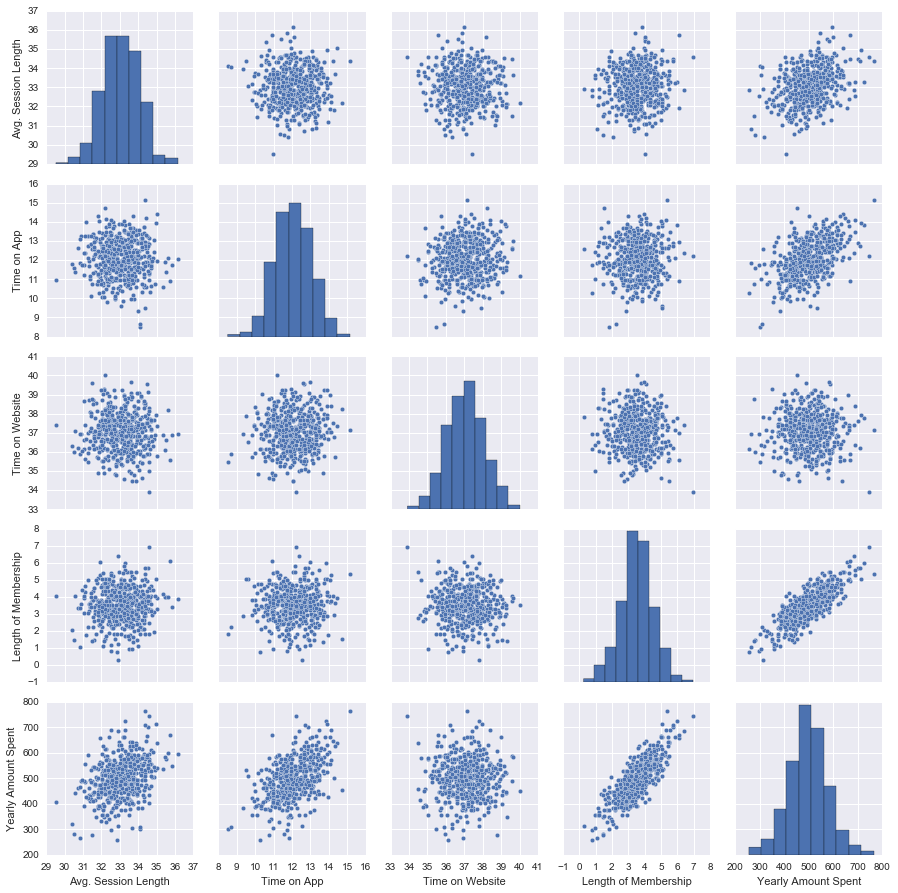

In [17]:
sns.pairplot(df)

**Creating a linear model plot (using seaborn's lmplot) of  Yearly Amount Spent vs. Length of Membership. **

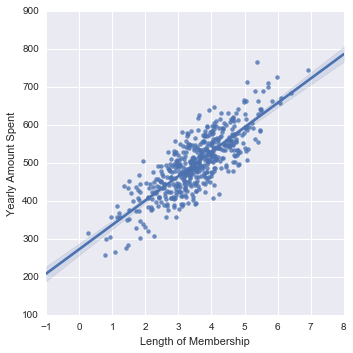

In [19]:
sns.lmplot(x='Length of Membership',y='Yearly Amount Spent',data=df)

## Training and Testing Data


In [26]:
df.columns

Index([u'Email', u'Address', u'Avatar', u'Avg. Session Length', u'Time on App',
       u'Time on Website', u'Length of Membership', u'Yearly Amount Spent'],
      dtype='object')

In [30]:
X=df[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership' ]]

In [33]:
Y=df['Yearly Amount Spent']

** Using model_selection.train_test_split from sklearn to split the data into training and testing sets. **

In [35]:
from sklearn.cross_validation import train_test_split

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=101)

## Training the Model

Now its time to train our model on our training data!

** Import LinearRegression from sklearn.linear_model **

In [37]:
from sklearn.linear_model import LinearRegression

**Creating an instance of a LinearRegression() model named lm.**

In [38]:
lm=LinearRegression()

** Train/fit lm on the training data.**

In [39]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

**Printing out the coefficients of the model**

In [45]:
coeff_df=pd.DataFrame(lm.coef_,X.columns,columns=['Coefficients'])
coeff_df

,Coefficients
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


## Predicting Test Data
Now that we have fit our model, let's evaluate its performance by predicting off the test values!

** Using lm.predict() to predict off the X_test set of the data.**

In [46]:
predictions=lm.predict(X_test)

** Creating a scatterplot of the real test values versus the predicted values. **

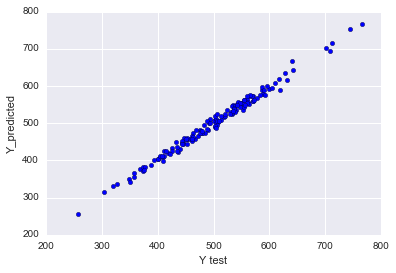

In [50]:
plt.scatter(y_test,predictions)
plt.xlabel('Y test')
plt.ylabel('Y_predicted')

## Evaluating the Model

Let's evaluate our model performance by calculating the residual sum of squares and the explained variance score (R^2).

** Calculating the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error. **

In [52]:
from sklearn import metrics

In [53]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

('MAE:', 7.2281486534308534)
('MSE:', 79.81305165097487)
('RMSE:', 8.9338150669786565)


## Residuals

**Ploting a histogram of the residuals and making sure it looks normally distributed. **

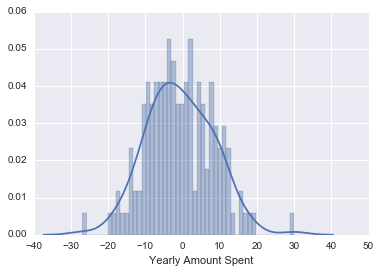

In [54]:
sns.distplot((y_test-predictions),bins=50);